In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [ ]:
df.isnull()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.rename(columns={'Humidity ':'Humidity','Soil Type': 'SoilType','Crop Type': 'CropType','Fertilizer Name': 'FertilizerName'}, inplace=True)

In [ ]:
encode_soil = LabelEncoder()
df['SoilType'] = encode_soil.fit_transform(df['SoilType'])

Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [ ]:
encode_ferti = LabelEncoder()
df['FertilizerName'] = encode_ferti.fit_transform(df['FertilizerName'])

Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


<Axes: xlabel='SoilType', ylabel='count'>

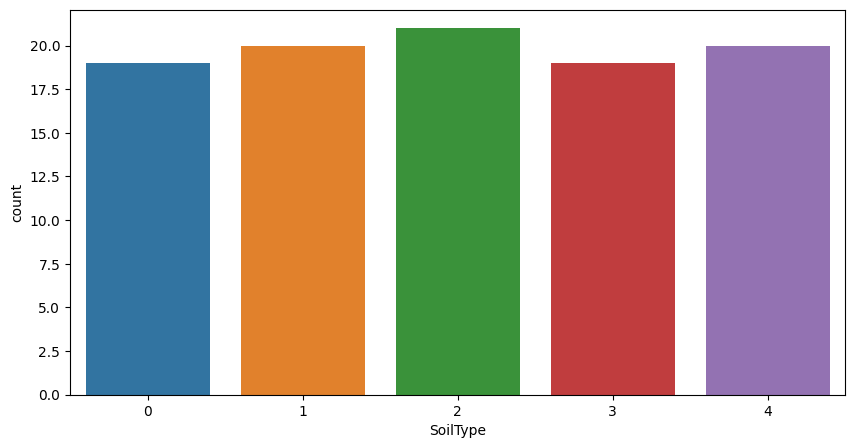

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='SoilType', data = df)

<Axes: xlabel='CropType', ylabel='count'>

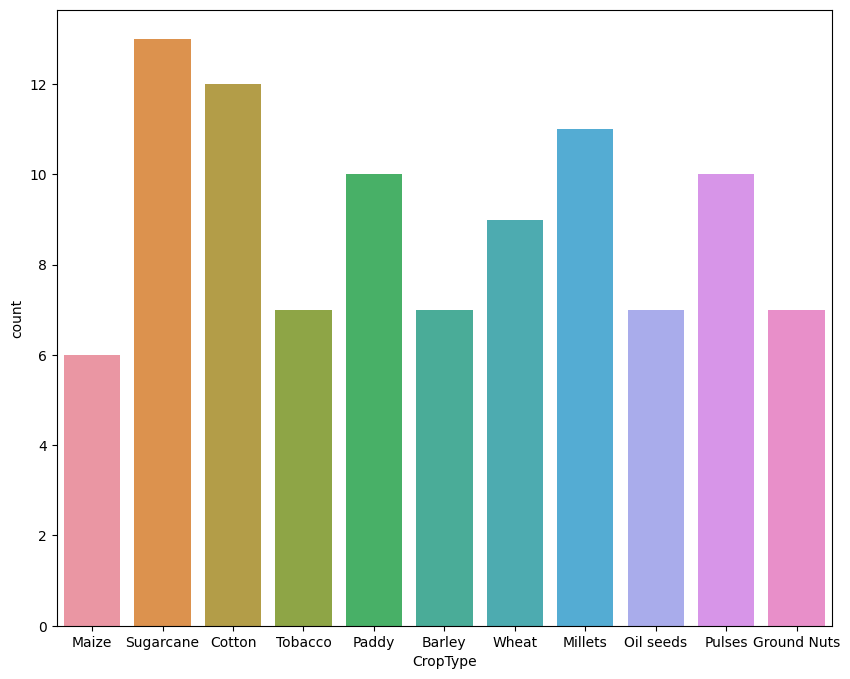

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='CropType', data = df)

<Axes: xlabel='FertilizerName', ylabel='count'>

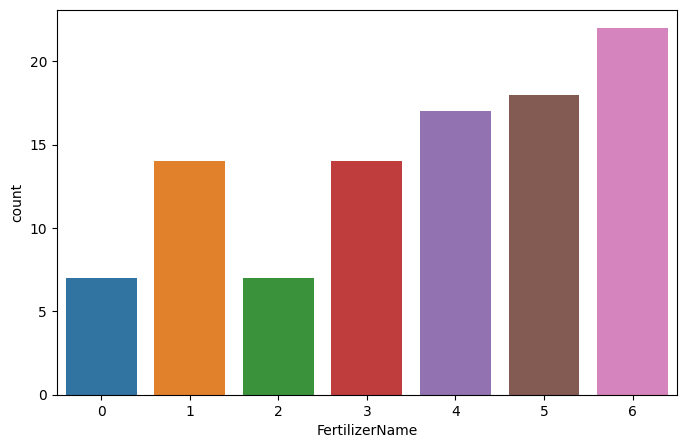

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='FertilizerName', data = df)

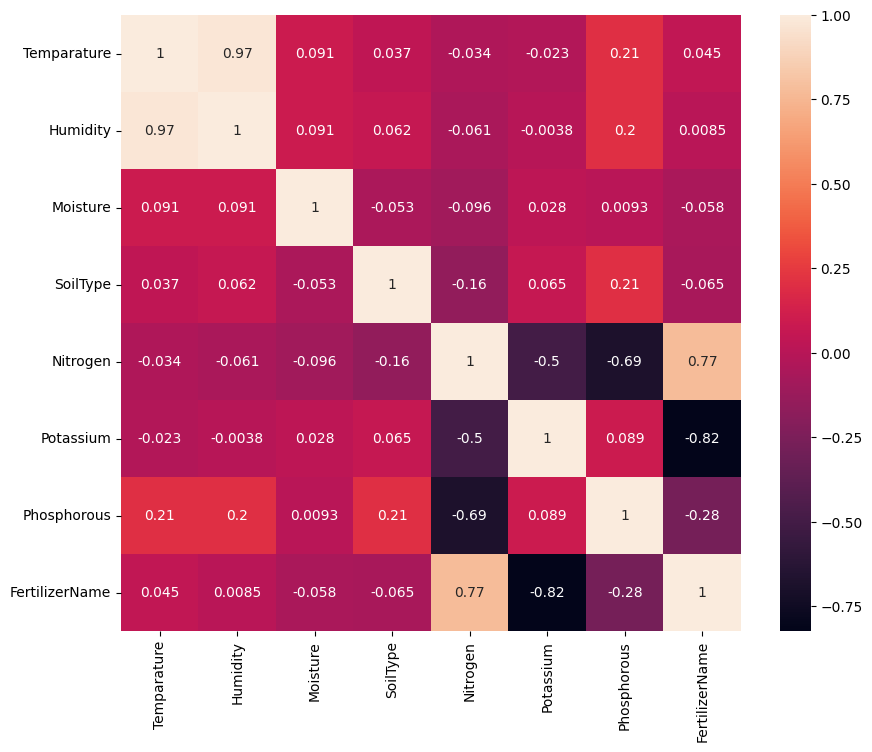

In [ ]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(["FertilizerName"],axis=1)
y=df["FertilizerName"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

In [ ]:
print("shape of x_train:",x_train.shape)
x_train

shape of x_train: (79, 8)


,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous
94,25,50,32,1,Pulses,24,0,19
70,26,52,39,1,Pulses,21,0,23
50,34,65,31,3,Tobacco,23,0,21
44,35,67,42,4,Barley,10,0,35
76,30,60,47,4,Maize,22,0,21
...,...,...,...,...,...,...,...,...
89,29,58,61,2,Cotton,11,0,38
28,37,70,32,0,Oil seeds,12,0,39
64,27,53,35,0,Oil seeds,37,0,0
15,31,62,49,0,Sugarcane,10,13,14


In [ ]:
print("size of x_test:",x_test.shape)
x_test

size of x_test: (20, 8)


,Temparature,Humidity,Moisture,SoilType,CropType,Nitrogen,Potassium,Phosphorous
19,29,58,52,2,Wheat,13,0,36
14,26,52,31,3,Ground Nuts,14,0,41
43,34,65,60,0,Sugarcane,35,0,0
37,37,70,37,1,Paddy,12,0,41
66,34,65,57,0,Sugarcane,9,0,13
3,32,62,34,3,Tobacco,22,0,20
80,28,54,43,1,Paddy,10,8,29
41,30,60,58,2,Sugarcane,10,7,32
38,25,50,26,3,Ground Nuts,15,14,11
68,25,50,40,1,Pulses,6,19,16


In [ ]:
print("shape of y_train",y_train.shape)
y_train

shape of y_train (79,)


94    4
70    4
50    4
44    5
76    4
     ..
89    5
28    5
64    6
15    2
9     1
Name: FertilizerName, Length: 79, dtype: int64

In [ ]:
print("shape of y_test",y_test.shape)
y_test

shape of y_test (20,)


19    5
14    5
43    6
37    5
66    3
3     4
80    1
41    1
38    2
68    0
2     1
1     5
60    6
53    5
88    0
74    5
91    0
26    1
59    5
46    3
Name: FertilizerName, dtype: int64

In [ ]:
for column in df.columns:
    if 'Pulses' in df[column].values:
        print("Column containing 'Pulses':", column)

Column containing 'Pulses': CropType


In [ ]:
label_encoder = LabelEncoder()
x_train['CropType'] = label_encoder.fit_transform(x_train['CropType'])

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
acc=classifier.score(x_train,y_train)
print("Accuracy of training set knn:",acc)

Accuracy of training set knn: 0.9493670886075949


In [ ]:
a=float(input("enter temparature value:"))
b=float(input("enter Humidity value:"))
c=float(input("enter Moisture value:"))
d=int(input("enter soil type value:"))
e=int(input("enter Crop type value:"))
f=float(input("enter Nitrogen value:"))
g=float(input("enter Potassium value:"))
h=float(input("enter Phoshporous value:"))
ans=classifier.predict([[a,b,c,d,e,f,g,h]])
if(((a>=20)&(a<=40)) & ((b>40)&(b<70)) & ((c>=20)&(c<=70)) & ((d>=0)&(d<=4)) & ((e>=0)&(e<=10)) & ((f>=0)&(f<=50)) & ((g>=0)&(g<=20)) &
    ((h>=0)&(h<=50))):
    if ans[0] == 0:
        print("10-26-26")
    elif ans[0] ==1:
        print("14-35-14")
    elif ans[0] == 2:
        print("17-17-17")
    elif ans[0] == 3:
        print("20-20")
    elif ans[0] == 4:
        print("28-28")
    elif ans[0]==5:
        print("DAP")
    elif ans[0]==6:
        print("Urea")
else:
    print("invalid input")

enter temparature value:40
enter Humidity value:45
enter Moisture value:36
enter soil type value:4
enter Crop type value:2
enter Nitrogen value:25
enter Potassium value:15
enter Phoshporous value:30
28-28
